In [56]:
#Importing required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import time 
import warnings
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

warnings.filterwarnings('ignore')

In [32]:
data_train = pd.read_csv('mnist_train.csv')
data_test = pd.read_csv('mnist_test.csv')
print("Train Data Shape is: ",data_train.shape)
data_train.head()

Train Data Shape is:  (60000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data_train = pd.read_csv('mnist_train.csv')
data_test = pd.read_csv('mnist_test.csv')

# Extracting label from data
y_train = data_train["label"]
x_train = data_train.drop('label',axis=1)
y_test = data_test["label"]
x_test = data_test.drop('label',axis=1)

print("x_train Shape: ",x_train.shape)
print("y_train Shape: ",y_train.shape)
print("x_label Shape: ",x_test.shape)
print("y_label Shape: ",y_test.shape)

x_train Shape:  (60000, 784)
y_train Shape:  (60000,)
x_label Shape:  (10000, 784)
y_label Shape:  (10000,)


In [ ]:
# Having a look at pixel values frequency (0 to 255). To get a better idea, lets convert the plot to Log Scale.
# Based on leading 0s and 255s we can try converting it to binary in the later steps to simplify the problem

In [51]:
# To simply the problem, converting images to black and white
# from gray scale by replacing all values > 0 to 1. 
x_train_b = x_train
x_test_b = x_test

x_test_b[x_test_b>0]=1
x_train_b[x_train_b>0]=1

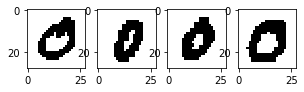

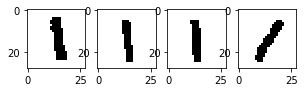

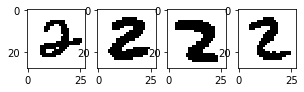

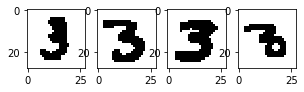

In [52]:
# And Converting 1D array to 2D 28x28 array using reshape , to plot and view binary images.

for x in range(0,4):
    train_0=x_train_b[y_train==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='binary')

In [62]:
### Classification using SVM - Binary + Dimensionality Reduction (PCA)
#reduce dimension with PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardize data
sc = StandardScaler().fit(x_train_b)
X_std_train = sc.transform(x_train_b)
X_std_test = sc.transform(x_test_b)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)

In [48]:
#Keeping 90% of information by choosing components falling within 0.90 cumulative
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
x_train_pca_b = sklearn_pca.fit_transform(X_std_train)
x_test_pca_b = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",x_train_pca_b.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",x_test_pca_b.shape)

Keeping 90% Info with  301  components
Shape before PCA for Train:  (60000, 784)
Shape after PCA for Train:  (60000, 301)
Shape before PCA for Test:  (10000, 784)
Shape after PCA for Test:  (10000, 301)


In [57]:
score=[]
fittime=[]
scoretime=[]
clf = svm.SVC(random_state=42)
clf.fit(x_train_pca_b, y_train.values.ravel())

# find the score using reduced dimensions keeping the same amount of samples, to compare accuracy.
start_time = time.time()
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(x_test_pca_b,y_test)
print("Accuracy: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case4=[score,fittime,scoretime]

Time consumed to fit model:  00:00:12
Accuracy:  0.9209
Time consumed to score model:  00:00:14


In [59]:
clf.get_params
parameters = {'gamma': [1, 0.1, 0.01, 0.001],
             'C': [1000, 100, 10, 1]} 
p = GridSearchCV(clf , param_grid=parameters, cv=3)
X=x_train_pca_b[:i]
y=y_train[:i].values.ravel()
start_time = time.time()
p.fit(X,y)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Time consumed to fit model:  00:08:24


In [61]:
# To verify, lets pass the optimal parameters to Classifier and check the score.
C=p.best_params_['C']
gamma=p.best_params_['gamma']
clf=svm.SVC(C=C,gamma=gamma, random_state=42)

start_time = time.time()
clf.fit(x_train_pca_b, y_train.values.ravel())
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
print("Accuracy for binary: ",clf.score(x_test_pca_b,y_test))

Time consumed to fit model:  00:04:57
Accuracy for binary:  0.972
